<a href="https://colab.research.google.com/github/JinHuiXu1991/DATA602/blob/main/Week3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: KNN and overfitting
# Lab: KNN

### References

* Raschka's [ch03.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb) -- github
    * KNN classification of Iris dataset
* [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) -- wikipedia

Figure (from wikipedia reference) shows how predicted class (green) can change with K.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg" width="300"/>

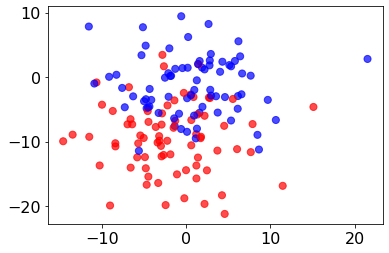

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np



plt.rcParams.update({'font.size': 16})
colors = ('red', 'blue')
cmap = ListedColormap(colors)

std_true = 5.0    # original: 1.5
n_samples = 150   # original: 100

X, y = make_blobs(n_samples, 2, centers=2, random_state=2, cluster_std=std_true)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap, alpha=.7);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [75 75]
Labels counts in y_train: [53 52]
Labels counts in y_test: [22 23]


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Recombine the scaled dataset
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


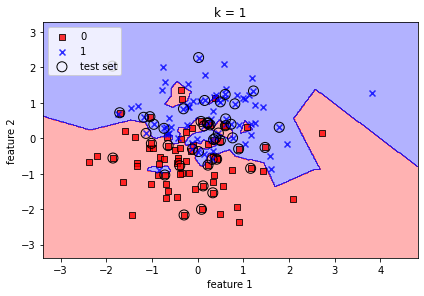

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k value
k = 1
knn = KNeighborsClassifier(n_neighbors=k, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('k = ' + str(k))
plt.show()

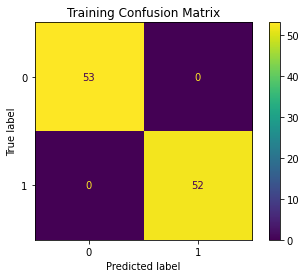

In [ ]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_train_std, y_train)
plt.title('Training Confusion Matrix')
plt.show(matrix)
plt.show()


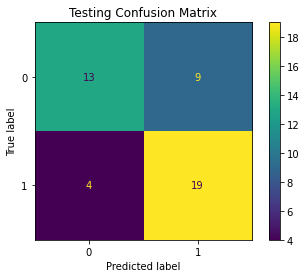

In [ ]:
matrix = plot_confusion_matrix(knn, X_test_std, y_test)
plt.title('Testing Confusion Matrix')
plt.show(matrix)
plt.show()

The training confusion matrix and testing confusion matrix shows the overfitting of the model when k value equals to 1.

# Question 2: Curse of dimensionality


# Lab: Curse of dimensionality

Reference: [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) (12th printing, 2017) by Hastie, Tibshirani and Friedman

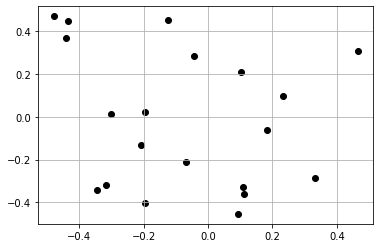

In [ ]:

np.random.seed(42)
samples = np.random.uniform(-.5,.5,(20, 2))

plt.scatter(samples[:,0], samples[:,1], c='black')
plt.grid();

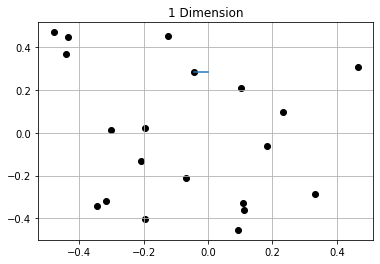

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

neigh_d1 = NearestNeighbors(radius=2)
neigh_d1.fit(samples[:,0].reshape(-1, 1))

# In 1-D, find the sample in the 1-D dataset samples[:,0] that is nearest to the origin x1=0
rng_d1 = neigh_d1.radius_neighbors([[0.]])

closest_index_d1 = np.asarray(rng_d1[0][0]).tolist().index(np.amin(np.asarray(rng_d1[0][0])))
closest_pt_d1 = samples[closest_index_d1]
closest_pt_d1

plt.scatter(samples[:,0], samples[:,1], c='black')
x_values_d1 = [closest_pt_d1[0], 0.]
y_values_d1 = [closest_pt_d1[1], closest_pt_d1[1]]
plt.plot(x_values_d1, y_values_d1)
plt.title('1 Dimension')
plt.grid();

closest point in 1D: [-0.04393002  0.28517596]
closest point in 2D: [ 0.18423303 -0.05984751]


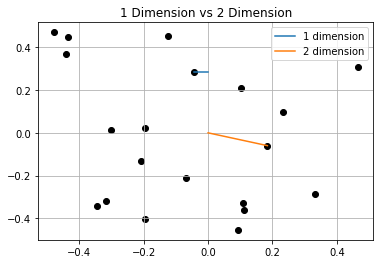

In [ ]:

neigh_d2 = NearestNeighbors(radius=2)
neigh_d2.fit(samples)

#In 2-D, find the element in samples that is closes to the 2-D origin: [x1, x2]=[0,0].
rng_d2 = neigh_d2.radius_neighbors([[0., 0.]])

closest_index_d2 = np.asarray(rng_d2[0][0]).tolist().index(np.amin(np.asarray(rng_d2[0][0])))
closest_pt_d2 = samples[closest_index_d2]
closest_pt_d2

print('closest point in 1D: ' + str(closest_pt_d1))
print('closest point in 2D: ' + str(closest_pt_d2))

plt.scatter(samples[:,0], samples[:,1], c='black')
x_values_d2 = [closest_pt_d2[0], 0.]
y_values_d2 = [closest_pt_d2[1], 0.]
plt.plot(x_values_d1, y_values_d1, label='1 dimension')
plt.plot(x_values_d2, y_values_d2, label='2 dimension')
plt.legend()
plt.title('1 Dimension vs 2 Dimension')
plt.grid();

Explain how this exercise illustrates the problem that adding dimensions leads to sparse sampling.

Every single dimension added, makes it harder and harder for two specific points to be close to each other in every dimension which will also decrease the performance of calculation. Larger number of dimension requires larger data set and additional calculation for finding the closest distance for each point.

Context

* $N$ = total number of samples (a constant).
* $p$ = number of features (each sample has $p$ features).
* Features are standardized on the unit cube in $p$ dimensions.
* Samples are uniformly distributed in all $p$ dimensions.

Problem

* You want to sample a fraction $r$ of the $N$ samples.
    * You must sample a fraction $r$ of the hypercube with volume $d^p$
    * $d$ is distance along the hypercube in one dimension
    * $d = r^{1/p}$

For example, if $r=0.1$ and $N=100$, then your sample size will be 10.

* If $p=1$, then $d=.1$ (1-D)
* If $p=2$, then $d=.32$ (2-D)
* If $p=3$, then $d=.46$
* If $p=10$, then $d=0.8$

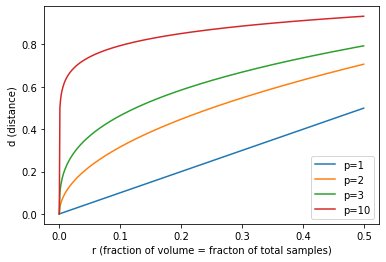

In [ ]:
n = 1000
r = np.arange(n*.5)/n

d_1 = r
d_2 = r**(1/2.)
d_3 = r**(1/3.)
d_10 = r**(1/10.)

plt.plot(r, d_1, label="p=1")
plt.plot(r, d_2, label='p=2')
plt.plot(r, d_3, label='p=3')
plt.plot(r, d_10, label='p=10')
plt.legend()
plt.ylabel("d (distance)")
plt.xlabel("r (fraction of volume = fracton of total samples)");

In other words, sampling 10% of N in 1-D requires that you sample 10% of the feature space. In 3-D, you need to sample a hypercube that's extends 40% on a side. And in 10-D, you need to sample 80% on a side. 

Viewed another way, suppose you want to maintain a sampling resolution if 10% of the feature space, $d=0.1$. In 1-D, you would be sampling 10% of $N$. In 2-D, you would sample 1% ($d^2$). And in 3-D, you sample 0.1% ($d^3$). So if $N=1000$, then on average you'd have 100 samples in 1-D, but only 1 sample in a 3-D hypercube. 

Bottom line: adding dimensions leads to sparse sampling -- the curse of dimensionality. Sparse sampling causes all sorts of problems, such as overfitting and poor numerical performance.